<a href="https://colab.research.google.com/github/thedarredondo/data-science-fundamentals/blob/main/Unit3/Unit3ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install "preliz[full,notebook]"

In [2]:
import preliz as pz

# Unit 3 Exercises: Delightfully Diverse Distirbutions

Use these exercises as a chance to explore the probability distributions (dists) from the pymc and preliz libraries. [Moments](https://en.wikipedia.org/wiki/Moment_(mathematics)), the main subject of these exercises, are a great way to describe dists, but there's another  way: [maximum entropy](https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution#Other_examples), which  we'll cover in a later unit.

Here's what we'll cover in this Unit's exercises:
- The first four moments: mean, variance, skew, and kurtosis, as well as the support.
- Single variable continuous distributions.
- Single variable discrete distriutions


Why do we need to know this stuff? Two reasons:
- Probability distributions are required to set priors and likelihoods in pymc.
- Randomness and uncertainty are not well defined mathematically, but probability and probability distributions are.

With that in mind, think of these exercises as an oppurtunity to explore the ways we can be uncertain, or the ways things can be random.

## The First Four Moments: Mean, Variance, Skew, and Kurtosis

When we talk about a probablity dist, we often care about at four things:
- The expected value, or where a distribution is centered (mean)
- The amount of variation from that centered value (variation)
- Whether or not our distribution favors, leans towards, or skews towards certain values. (skew)
- How often to expect unusually high or low values. (kurtosis)

### Playing with Beta

**Task1**:

Plot a [preliZ Beta distribution](https://preliz.readthedocs.io/en/latest/api_reference.html#preliz.distributions.beta.Beta) with $α=1$ and $β=1$.

<Axes: >

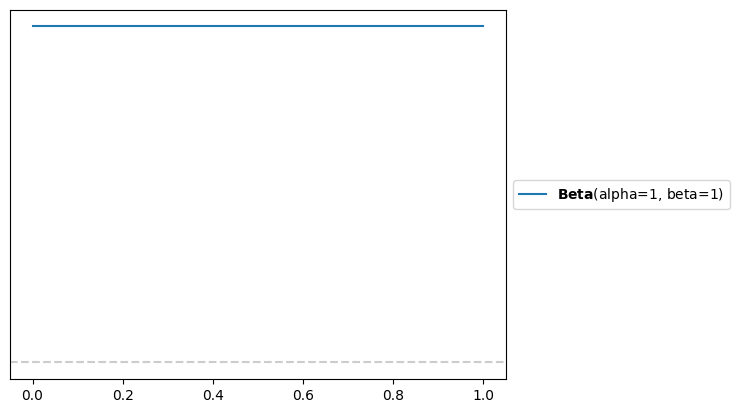

In [4]:
beta = pz.Beta(alpha=1, beta=1)
beta.plot_pdf()

**Task2**:

Find the mean, variance, skew, and kurtosis of a $Beta(1,1)$ distribution. This is the same as asking for the first four moments of a $Beta(1,1)$ distribution.

*Hint*: preliZ has built in function that does this for you.

In [5]:
beta.moments()

[0.5, 0.08333333333333333, array(0.), -1.2]

**Task3**:

Plot the following distributions: $Beta(1,1)$, $Beta(0.9,0.9)$, $Beta(2,1)$, $Beta(1,2)$, $Beta(7,11)$, $Beta(96,42)$, $Beta(5,5)$, $Beta(500,500)$, $Beta(0.8,0.9)$.

Then, determine which of those distribtuions has:
- the largest/smallest mean
- the largest/smallest variance
- the largest/smallest skew
- the largest/smallest kurtosis

In [6]:
from dataclasses import dataclass

In [12]:
dists = [
    pz.Beta(alpha=1, beta=1),
    pz.Beta(alpha=0.9, beta=0.9),
    pz.Beta(alpha=2, beta=1),
    pz.Beta(alpha=1, beta=2),
    pz.Beta(alpha=7, beta=11),
    pz.Beta(alpha=96, beta=42),
    pz.Beta(alpha=5, beta=5),
    pz.Beta(alpha=500, beta=500),
    pz.Beta(alpha=0.8, beta=0.9),
]

@dataclass
class SignificantDistribution:
    description: str
    index: int
    distribution: pz.Beta | None

min_values = [
    SignificantDistribution(description="Smallest Mean", index=0, distribution=None),
    SignificantDistribution(description="Smallest Variance", index=1, distribution=None),
    SignificantDistribution(description="Smallest Skew", index=2, distribution=None),
    SignificantDistribution(description="Smallest Kurtosis", index=3, distribution=None),
]

max_values = [
    SignificantDistribution(description="Largest Mean", index=0, distribution=None),
    SignificantDistribution(description="Largest Variance", index=1, distribution=None),
    SignificantDistribution(description="Largest Skew", index=2, distribution=None),
    SignificantDistribution(description="Largest Kurtosis", index=3, distribution=None),
]

In [13]:
for distribution in dists:
    for min_dist in min_values:
        if min_dist.distribution is None or distribution.moments()[min_dist.index] < min_dist.distribution.moments()[min_dist.index]:
            min_dist.distribution = distribution

    for max_dist in max_values:
        if max_dist.distribution is None or distribution.moments()[max_dist.index] > max_dist.distribution.moments()[max_dist.index]:
            max_dist.distribution = distribution

In [22]:
print("Minimum values:")
for distribution in min_values:
    print(f"{distribution.description}: {distribution.distribution}  ({distribution.distribution.moments()[distribution.index]})")

print("\n\nMaximum values:")
for distribution in max_values:
    print(f"{distribution.description}: {distribution.distribution}  ({distribution.distribution.moments()[distribution.index]})")

Minimum values:
Smallest Mean: Beta(alpha=1, beta=2)  (0.3333333333333333)
Smallest Variance: Beta(alpha=500, beta=500)  (0.00024975024975024975)
Smallest Skew: Beta(alpha=2, beta=1)  (-0.565685424949238)
Smallest Kurtosis: Beta(alpha=0.8, beta=0.9)  (-1.263657274295572)


Maximum values:
Largest Mean: Beta(alpha=96, beta=42)  (0.6956521739130435)
Largest Variance: Beta(alpha=0.8, beta=0.9)  (0.09227220299884659)
Largest Skew: Beta(alpha=1, beta=2)  (0.565685424949238)
Largest Kurtosis: Beta(alpha=500, beta=500)  (-0.005982053838484547)


### Playing with other Continuous Distributions

For the remaining tasks, make sure to continue to use the [preliZ documentation](https://preliz.readthedocs.io/en/latest/api_reference.html).

The [wikipedia pages for each of the probability distributions](https://en.wikipedia.org/wiki/List_of_probability_distributions) are also great resources.

[Wolfram Alpha](https://www.wolframalpha.com/examples/mathematics/probability/probability-distributions) is another great resource as well.

**Task4**:

Plot the pdfs of each of the following distributions: $Normal(μ=0,σ=1)$, $StudentT(ν=1,μ=0,σ=1)$, $Exponential(λ=1/2)$, $Gamma(α=2,β=1)$, $HalfStudentT(ν=1,σ1)$

For the T distribution, use

```
support=(-4,4)
```
inside the plot_pdf function.


**Task5**:

What x values do the Exponenital, Gamma, HalfSutdentT, and HalfNormal functions support? What x values do the Normal and T distribution support? What x values does the Beta distribution support?

**Task6**:

Can a distribution with support $[0,∞]$ have zero skew? If so, plot that specific distribution.

**Task7**:

Name a distribution that supports the real numbers with variance equal to 1, 0 skew, and 0 kurtosis.

**Task8**:

Name a distribution with support $(-∞,∞)$ and that has negative skew.

###Playing with Discrete Distributions

**Task9**:

Plot the pdfs (techincally the pmfs) of the following distributions: $Bernoulli(p=0.7)$, $Binomial(n=10,p=0.7)$, $Poisson(λ=7)$, $Geometric(p=0.7)$, $HyperGeometric(N=50,k=35,n=15)$, $Categorical(p=[0.05,0.3,0.05,0.1,0.2,0.4])$

Additionally, compute the first four moments for all those distributions--except the Categorical distribution.

**Task10**:

Describe what process each of the previous discrete distributions models, and their support.

Hint: Make sure to read any of the preliZ documentation, the wikipedia articles, or wolfram alpha.
